# 深度神經網路（DNN）迴歸基礎教學
在這份教學中，我們將介紹如何使用 TensorFlow 來建構一個基礎的深度神經網路（DNN）進行迴歸分析。迴歸問題是機器學習中的一種重要任務，主要用於預測連續數值，例如房價預測、汽車油耗等。在這裡，我們將一步步地帶領你學習如何從資料處理、模型構建到模型訓練，逐步掌握 DNN 迴歸的核心概念。

## 1. 載入套件

首先，我們匯入必要的套件：

In [71]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. 資料準備
為了進行迴歸分析，我們需要一組訓練數據。在這裡，我們將使用一個簡單的合成數據集，模擬一個線性關係。這段程式創建了一組具有隨機雜訊的線性數據，並使用 Matplotlib 繪製出來，讓我們可以直觀地看到輸入與輸出之間的關係。


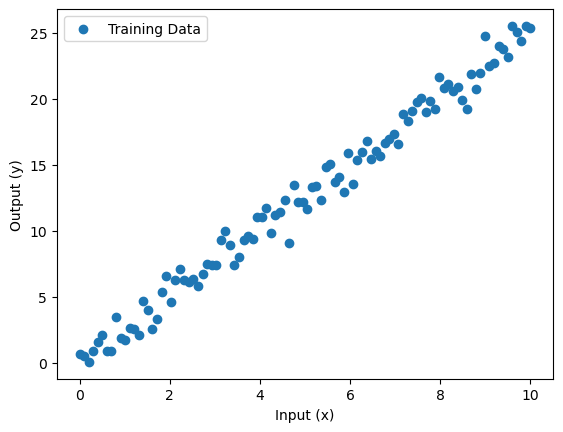

In [72]:
# 產生簡單的線性數據
def generate_data():
    x = np.linspace(0, 10, 100)
    y = 2.5 * x + np.random.normal(0, 1, size=x.shape)
    return x, y

x_train, y_train = generate_data()

# 視覺化數據
plt.scatter(x_train, y_train, label='Training Data')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.show()

## 3. 建構 DNN 模型
接下來，我們來建構一個簡單的深度神經網路模型。這個模型將包含幾個全連接層，用於擬合我們的數據。在這裡，我們使用了 `tf.keras.Sequential` 來建立模型，包含一層隱藏層，有 8 個神經元，並使用線性 linear 作為激發函數。輸出層有一個神經元，用於預測目標值。模型的損失函數為均方誤差（MSE），優化器則使用 Adam 來加速訓練。

In [73]:
# 建構 DNN 模型
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='linear'),
    tf.keras.layers.Dense(1)
])

# 編譯模型
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## 4. 模型訓練
我們已經建構了模型，接下來我們將模型與數據進行訓練。這段程式將模型訓練 100 個 epoch，每次使用 10 個數據進行更新。通過調整 epoch 和 batch_size 的值，我們可以控制模型訓練的速度和效果。

In [30]:
# 訓練模型
model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 235.1038 - mae: 13.2668
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 225.0407 - mae: 12.9736
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 214.8274 - mae: 12.6725
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 205.3485 - mae: 12.3833
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 195.5571 - mae: 12.0808
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 186.6075 - mae: 11.7886
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 176.9405 - mae: 11.4765
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 167.9902 - mae: 11.1711
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 158.9287 - mae: 10.8651
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 150.5427 - mae: 10.5636
Epoch 11/100
10/10 [=========

## 5. 模型評估與預測

訓練完模型後，我們可以使用它來進行預測，並評估模型的效果。這段程式碼首先評估了模型在訓練數據上的表現，並使用訓練好的模型對新數據進行預測。最後，我們用圖表展示訓練數據和模型的預測結果。

4/4 [==============================] - 0s 1ms/step - loss: 1.2854 - mae: 0.9219
模型損失（MSE）：1.2853612899780273, 平均絕對誤差（MAE）：0.9218968749046326
4/4 [==============================] - 0s 994us/step


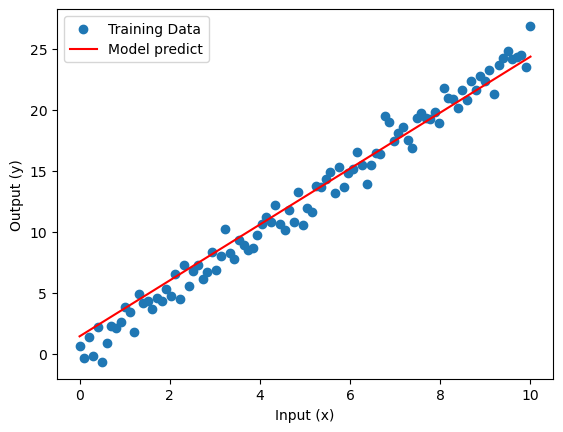

In [31]:
# 評估模型效果
loss, mae = model.evaluate(x_train, y_train)
print(f'模型損失（MSE）：{loss}, 平均絕對誤差（MAE）：{mae}')

# 進行預測
x_test = np.linspace(0, 10, 100)
y_pred = model.predict(x_test)

# 繪製預測結果
plt.scatter(x_train, y_train, label='Training Data')
plt.plot(x_test, y_pred, color='red', label='Model predict')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.show()

## 6. 模型保存與輸出
最後，我們可以將訓練好的模型保存起來，以便日後使用或部署。這段程式將模型保存為 HDF5 格式的檔案，讓我們可以在需要時載入模型進行預測或重新訓練。

In [32]:
# 保存模型
model.save('dnn_regression_model.h5')
print('模型已成功保存至 dnn_regression_model.h5')

模型已成功保存至 dnn_regression_model.h5


在保存模型之後，我們可以重新載入它並進行推論。這段程式首先重新載入保存的模型，接著對新的輸入值 x = 5.0 進行推論，並輸出預測結果。

In [33]:
# 載入模型並進行推論
loaded_model = tf.keras.models.load_model('dnn_regression_model.h5')
print('模型已成功載入')

# 使用載入的模型進行推論
x_new = np.array([5.0])
y_new_pred = loaded_model.predict(x_new)
print(f'當 x = 5.0 時，模型預測的 y 值為：{y_new_pred[0][0]}')

模型已成功載入
1/1 [==============================] - 0s 37ms/step
當 x = 5.0 時，模型預測的 y 值為：12.900809288024902


## 結論
在本教學中，我們學會了如何使用 TensorFlow 構建一個簡單的深度神經網路來進行迴歸預測。我們從資料準備開始，一直到模型建構、訓練和評估，完整地了解了整個過程。接下來，你可以嘗試使用其他不同的資料集或改變模型結構，來進一步提高模型的準確度和效果。

## 小試身手：練習題

現在，你已經學會了如何構建一個深度神經網路來進行迴歸分析，下面我們設計一個小練習來加深理解。

**練習題目**

請嘗試以下步驟完成一個小練習：

1. **改變資料集**：
將資料集改為非線性的數據，例如：y = 0.5 * x^3 - 2 * x^2 + x + 雜訊，並視覺化這些資料。

```py
# 產生非線性數據集
def generate_nonlinear_data():
    x = np.linspace(0, 10, 100)
    y = 0.5 * x**3 - 2 * x**2 + x + np.random.normal(0, 5, size=x.shape)
    return x, y

x_train, y_train = generate_nonlinear_data()
```

2. **調整模型結構**：
修改模型的結構，增加隱藏層的數量或者神經元數，同時將激發函數替換成非線性(例如: relu)，看看對結果有什麼影響。

3. **訓練與評估模型**：
使用新的資料集和模型結構進行訓練，並評估模型效果。觀察均方誤差（MSE）和平均絕對誤差（MAE）是否有變化。

4. **預測與視覺化結果**：
使用訓練好的模型進行預測，並將預測結果與真實數據一起繪製出來，看看模型的擬合情況如何。

### 參考答案

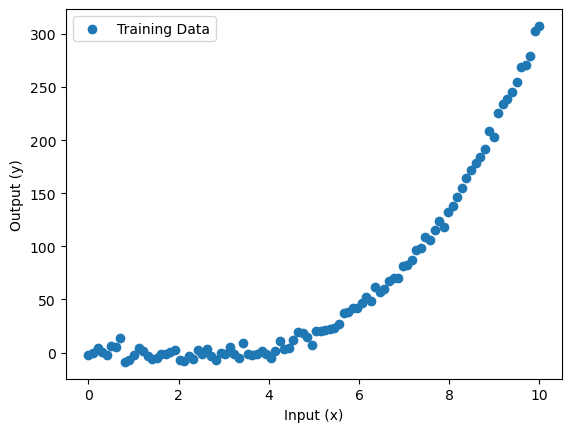

In [41]:
# 產生非線性數據集
def generate_nonlinear_data():
    x = np.linspace(0, 10, 100)
    y = 0.5 * x**3 - 2 * x**2 + x + np.random.normal(0, 5, size=x.shape)
    return x, y

x_train, y_train = generate_nonlinear_data()

# 視覺化數據
plt.scatter(x_train, y_train, label='Training Data')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.show()

In [68]:
# 調整 DNN 模型
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 編譯模型
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [69]:
# 訓練模型
model.fit(x_train, y_train, epochs=200, batch_size=10, verbose=1)

# 評估模型效果
loss, mae = model.evaluate(x_train, y_train)
print(f'模型損失（MSE）：{loss}, 平均絕對誤差（MAE）：{mae}')

Epoch 1/200
10/10 [==============================] - 1s 1ms/step - loss: 11620.9248 - mae: 65.5303
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 11159.7686 - mae: 63.8494
Epoch 3/200
10/10 [==============================] - 0s 1ms/step - loss: 10471.2314 - mae: 61.6063
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 9418.8115 - mae: 58.0511
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 7891.1074 - mae: 53.6320
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 5732.1987 - mae: 48.4156
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 3985.7927 - mae: 45.2257
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 3271.7319 - mae: 46.7454
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 3263.0012 - mae: 49.8455
Epoch 10/200
10/10 [==============================] - 0s 1ms/step - loss: 3197.6140 - mae: 49.2651
Epoch 11/200
10/

4/4 [==============================] - 0s 1ms/step


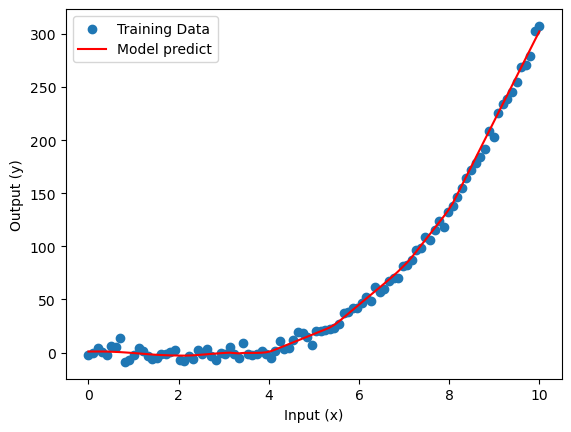

In [70]:
# 進行預測
x_test = np.linspace(0, 10, 100)
y_pred = model.predict(x_test)

# 繪製預測結果
plt.scatter(x_train, y_train, label='Training Data')
plt.plot(x_test, y_pred, color='red', label='Model predict')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.show()